In [2]:
import json
import pandas as pd
import datetime

import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 100)

## Public matches (general info)

In [4]:
with open('../data/public_matches.json') as f:
    public_matches = json.load(f)

In [5]:
public_matches_df = pd.DataFrame(public_matches)
public_matches_df['start_time'] = pd.to_datetime(
    public_matches_df.start_time,unit='s')

In [6]:
public_matches_df.shape

(100000, 14)

In [7]:
public_matches_df.head()

,match_id,match_seq_num,radiant_win,start_time,duration,avg_mmr,num_mmr,lobby_type,game_mode,avg_rank_tier,num_rank_tier,cluster,radiant_team,dire_team
0,6808764902,5701512375,False,2022-10-16 15:33:11,3160,2574.0,1.0,7,22,44,4,184,"8,2,135,39,75","19,129,51,6,84"
1,6808764901,5701493794,True,2022-10-16 15:33:10,2522,3876.0,3.0,7,22,54,8,183,"6,50,49,52,22","44,87,2,74,25"
2,6808764900,5701487411,True,2022-10-16 15:32:57,2252,NaN,NaN,7,22,13,2,251,"19,84,64,16,39","26,12,27,136,8"
3,6808764819,5701481355,False,2022-10-16 15:33:26,2039,4178.0,2.0,7,22,51,4,153,"26,102,41,137,13","106,96,7,52,5"
4,6808764815,5701476969,False,2022-10-16 15:33:21,1930,NaN,NaN,0,4,53,3,274,"12,23,25,20,33","86,101,62,82,109"


In [8]:
public_matches_df.start_time

0       2022-10-16 15:33:11
1       2022-10-16 15:33:10
2       2022-10-16 15:32:57
3       2022-10-16 15:33:26
4       2022-10-16 15:33:21
                ...        
99995   2022-10-15 16:36:48
99996   2022-10-15 16:36:48
99997   2022-10-15 16:36:48
99998   2022-10-15 16:36:42
99999   2022-10-15 16:36:42
Name: start_time, Length: 100000, dtype: datetime64[ns]

<AxesSubplot: >

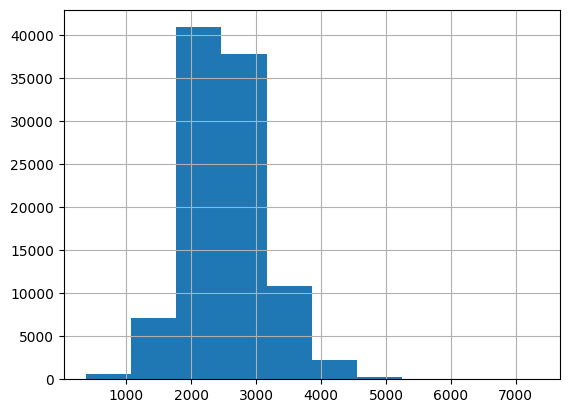

In [9]:
public_matches_df.duration.hist()

In [10]:
public_matches_df.duration.quantile(0.01) / 60

20.649833333333333

<AxesSubplot: >

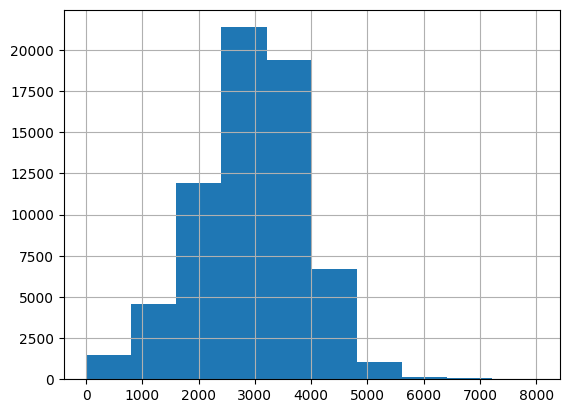

In [11]:
public_matches_df.avg_mmr.hist()

In [12]:
# https://github.com/odota/dotaconstants/blob/master/json/lobby_type.json
public_matches_df.lobby_type.value_counts()

7    76505
0    22855
9      583
1       57
Name: lobby_type, dtype: int64

In [13]:
# https://github.com/odota/dotaconstants/blob/master/json/game_mode.json
public_matches_df.game_mode.value_counts()

22    91595
4      4562
3      2956
2       790
5        95
16        2
Name: game_mode, dtype: int64

<AxesSubplot: >

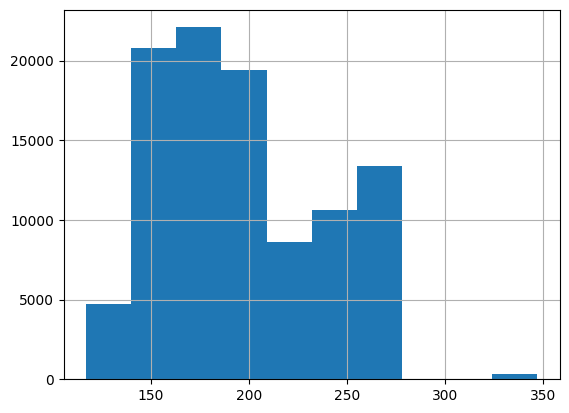

In [14]:
public_matches_df.cluster.hist()

## Public matches details

In [105]:
with open('../data/matches_details.json') as f:
    matches_details = json.load(f)

JSONDecodeError: Expecting value: line 1 column 54914096 (char 54914095)

In [ ]:
matches_details_df = pd.DataFrame(matches_details)

In [106]:
matches_details_df.shape

(8502, 49)

In [39]:
matches_details_df = matches_details_df[
    ~matches_details_df.match_id.isna()]

In [40]:
matches_details_df.shape

(3258, 49)

<AxesSubplot: >

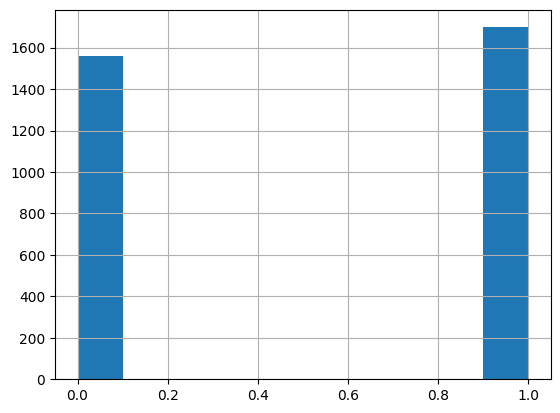

In [41]:
matches_details_df[~matches_details_df.radiant_win.isna()]\
    .radiant_win.astype(int).hist()

In [42]:
matches_with_chat = matches_details_df[
    ~matches_details_df.chat.isna()]

In [43]:
matches_with_chat.shape

(21, 49)

In [44]:
21 / 3000 * 100_000

700.0

In [99]:
i = 20
one_chat = matches_with_chat.chat.values[i]

In [100]:
pd.Series.value_counts([c['type'] for c in one_chat])

chatwheel    16
chat          9
dtype: int64

In [101]:
[f"{c['key']} : {c['time'] // 60}min" \
 for c in one_chat if c['type'] == 'chat']

['end  : 13min',
 's8 : 14min',
 'delete ur item  : 14min',
 'will you defend? : 14min',
 'rat strat? : 22min',
 'help me commend this duo : 22min',
 'ld lycan : 22min',
 'idiot call idiot : 22min',
 'ask ur bane : 22min']